In [1]:
from utils import plot_text_mel_alignment,  get_duration_from_textgrid
import os, librosa
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
    textgrid_dir = "/mnt/hdd3/minsu/ICLR2023/mfa/MFAFormatter/result/ESD_dataset/TextGrid"

wav_paths = ["./preprocessed/ESD_dataset/0011_Happy/0011_001000.wav",
            "./preprocessed/ESD_dataset/0011_Neutral/0011_000100.wav"
             
            ]
             #"./preprocessed/ESD_dataset/0011_Happy/0011_000700.wav",
             #"./preprocessed/ESD_dataset/0011_Neutral/0011_000700.wav",
             #"./preprocessed/ESD_dataset/0011_Sad/0011_000700.wav",
             #"./preprocessed/ESD_dataset/0011_Surprise/0011_000700.wav"]

# mel-preprocess settings
sampling_rate = 16000
hop_length=256
win_length = 1024
n_fft = 1024
n_mels = 80
fmin, fmax = 0, 8000

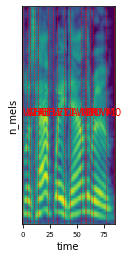

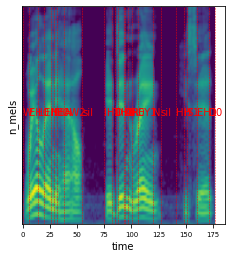

In [3]:
%matplotlib inline

for wav_path in wav_paths:
    wav_filename = "/".join(wav_path.split("/")[-2:])
    textgrid_filepath = os.path.join(textgrid_dir, wav_filename.replace(".wav", ".TextGrid"))
    
    phone_sequence, durations, start_time, end_time = get_duration_from_textgrid(textgrid_filepath, sampling_rate=sampling_rate, hop_length=hop_length)
    phone_sequence.append("0")
    durations.insert(0, 0)
    segmentation_boundary = np.cumsum(durations)
    
    wav, sr = librosa.load(wav_path, sr=sampling_rate)
    
    if sr != sampling_rate:
        print("[ERROR] sampling rate doesn't match! ({}) vs ({})".format(sr, sampling_rate))
        break
        
    mel = librosa.feature.melspectrogram(y=wav[start_time:end_time], sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length,
                                                fmin=fmin, fmax=fmax, n_mels=n_mels)
    
    mel = librosa.power_to_db(mel, ref=np.max)
    

    plot_text_mel_alignment(mel, segmentation_boundary, phone_sequence)

In [4]:
durations

[0,
 6,
 8,
 6,
 6,
 3,
 3,
 6,
 17,
 20,
 7,
 3,
 3,
 5,
 1,
 3,
 4,
 5,
 14,
 7,
 14,
 7,
 3,
 9,
 11,
 6]